# Exercise 12 – Bayesian inference and Data assimilation

**Group : Duckies**

## 1.1 
The variance of the sample mean $\bar{g}_{X}$ can be calculated as follows:

Since $X_{i}$ are iid samples from the distribution $\pi$, $g(X_{i})$ are also iid. Let $\sigma^{2} = Var(g(X))$. Then, by the properties of variance, we have:

$$
Var(\bar{g}_{X}) = Var\left(\frac{1}{N} \sum_{i=1}^{N} g\left(X_{i}\right)\right) = \frac{1}{N^{2}} Var\left(\sum_{i=1}^{N} g\left(X_{i}\right)\right) = \frac{1}{N^{2}} \sum_{i=1}^{N} Var\left(g\left(X_{i}\right)\right) = \frac{N\sigma^{2}}{N^{2}} = \frac{\sigma^{2}}{N}
$$

So, the variance of the sample mean $\bar{g}_{X}$ is $\frac{\sigma^{2}}{N}$, where $\sigma^{2}$ is the variance of $g(X)$.|

## 1.2 
This is a result of the importance sampling technique. The idea is to estimate the expected value of $g(X)$ with respect to the distribution $\pi$ by using samples from another distribution $\pi^{\prime}$.

We can derive the result as follows:

$$
\pi[g] = \mathbb{E}_{\pi}[g(X)] = \int g(x) \pi(x) dx = \int g(x) \frac{\pi(x)}{\pi^{\prime}(x)} \pi^{\prime}(x) dx = \mathbb{E}_{\pi^{\prime}}\left[\frac{\pi(Y)}{\pi^{\prime}(Y)} g(Y)\right]
$$

So, we have shown that $\pi[g] = \mathbb{E}\left[\frac{\pi(Y)}{\pi^{\prime}(Y)} g(Y)\right]$.

## 1.3 
The variance of the new sample mean $\bar{g}_{Y}$ can be calculated as follows:

Let $Z_{i} = \frac{\pi(Y_{i})}{\pi^{\prime}(Y_{i})} g(Y_{i})$. Since $Y_{i}$ are iid samples from the distribution $\pi^{\prime}$, $Z_{i}$ are also iid. Let $\sigma^{2}_{Z} = Var(Z_{i})$. Then, by the properties of variance, we have:

$$
Var(\bar{g}_{Y}) = Var\left(\frac{1}{N} \sum_{i=1}^{N} Z_{i}\right) = \frac{1}{N^{2}} Var\left(\sum_{i=1}^{N} Z_{i}\right) = \frac{1}{N^{2}} \sum_{i=1}^{N} Var\left(Z_{i}\right) = \frac{N\sigma^{2}_{Z}}{N^{2}} = \frac{\sigma^{2}_{Z}}{N}
$$

So, the variance of the new sample mean $\bar{g}_{Y}$ is $\frac{\sigma^{2}_{Z}}{N}$, where $\sigma^{2}_{Z}$ is the variance of $Z_{i}$.

## 1.4 
Let's denote $h(Y) = \frac{\pi(Y)}{\pi^{\prime}(Y)} g(Y)$. Then, the variance of $\bar{g}_{Y}$ can be expressed as:

$$
Var(\bar{g}_{Y}) = \frac{1}{N} Var_{\pi^{\prime}}(h(Y)) = \frac{1}{N} \left(\mathbb{E}_{\pi^{\prime}}[h(Y)^2] - \mathbb{E}_{\pi^{\prime}}[h(Y)]^2\right)
$$

Since $\mathbb{E}_{\pi^{\prime}}[h(Y)] = \pi[g]$ is a constant, we can minimize the variance of $\bar{g}_{Y}$ by minimizing $\mathbb{E}_{\pi^{\prime}}[h(Y)^2]$.

Let's expand the expression for $\mathbb{E}_{\pi^{\prime}}[h(Y)^2]$:

$$
\mathbb{E}_{\pi^{\prime}}[h(Y)^2] = \int h(y)^2 \pi^{\prime}(y) dy = \int \left(\frac{\pi(y)}{\pi^{\prime}(y)} g(y)\right)^2 \pi^{\prime}(y) dy = \int \frac{\pi(y)^2}{\pi^{\prime}(y)} g(y)^2 dy
$$

To minimize this expression, we can use the Cauchy-Schwarz inequality:

$$
\int \frac{\pi(y)^2}{\pi^{\prime}(y)} g(y)^2 dy \geq \left(\int \sqrt{\frac{\pi(y)^2}{\pi^{\prime}(y)}} |g(y)| \sqrt{\pi^{\prime}(y)} dy\right)^2 = \left(\int \pi(y) |g(y)| dy\right)^2
$$

The equality holds when $\sqrt{\frac{\pi(y)^2}{\pi^{\prime}(y)}} |g(y)| = k \sqrt{\pi^{\prime}(y)}$ for some constant $k$. Solving for $\pi^{\prime}(y)$, we get:

$$
\sqrt{\frac{\pi(y)^2}{\pi^{\prime}(y)}} |g(y)| = k \sqrt{\pi^{\prime}(y)} \\
\Leftrightarrow \frac{\pi(y)^2}{\pi^{\prime}(y)} g(y)^2 = k^{2} \pi^{\prime}(y) \\
\Leftrightarrow \pi^{\prime}(y) = \frac{\pi(y)^2 g(y)^2}{k^{2}}
$$

Since $\int \pi^{\prime}(y) dy = 1$, we have:

$$
k^{2} = \int \frac{k^{2} \pi(y)^2 g(y)^2}{k^{2}} dy = \int \pi(y)^2 g(y)^2 dy
$$

So, the optimal choice of $\pi^{\prime}$ that minimizes the variance of $\bar{g}_{Y}$ is:

$$
\boxed{
    \displaystyle
    \pi^{\prime}(y) = \frac{\pi(y)^2 g(y)^2}{\int \pi(x)^2 g(x)^2 dx}
}
$$

In practice, however, it might not be possible to achieve this optimal choice of $\pi^{\prime}$, and one would need to propose a suitable distribution that can represent $\pi[g]$ well or is easy to sample from.

## 1.5 
Here is a pseudo-code for the importance resampling algorithm to generate $N$ samples from $\pi$:

```
1. Generate N samples Y_i from the proposal distribution pi'
2. Calculate the unnormalized weights tilde_w_i = C * pi(Y_i) / pi'(Y_i) for i = 1,...,N
3. Normalize the weights w_i = tilde_w_i / sum(tilde_w_i) for i = 1,...,N
4. Resample X_i from Y_i with probability mass function w_i for i = 1,...,N
5. Return the resampled values X_i for i = 1,...,N
```

This algorithm generates $N$ samples $Y_{i}$ from the proposal distribution $\pi^{\prime}$, calculates the importance weights $w_{i}$, and then resamples $X_{i}$ from $Y_{i}$ with probability mass function $w_{i}$. The resulting samples $X_{i}$ can be used to approximate the distribution $\pi$.

## 2.1 
Here is a pseudo-code for implementing the particle filter algorithm:

```
1. Initialize N particles x_0^i from the prior distribution p_0 for i = 1,...,N
    for time horizon T
2. Set the initial weights w_0^i = 1/N for i = 1,...,N
3. for n = 1 to T do
4.     for i = 1 to N do
5.         Sample x_n^i from the transition kernel p_n(x_n | x_{n-1}^i)
6.         Update the weight w_n^i = w_{n-1}^i * q_n(y_n | x_n^i)
7.     end for
8.     Normalize the weights w_n^i = w_n^i / sum(w_n^i) for i = 1,...,N
9. end for
10. Return (x_T^i, w_T^i) for i = 1,...,N
```

This algorithm generates $N$ particles $x_{0}^{i}$ from the prior distribution $p_{0}$ and sets their initial weights to $w_{0}^{i} = 1/N$. Then, it iterates over time from $n=1$ to $T$. At each time step, it samples new particles $x_{n}^{i}$ from the transition kernel $p_{n}(x_{n} | x_{n-1}^{i})$ and updates their weights using the observation likelihood $q_{n}(y_{n} | x_{n}^{i})$. The weights are then normalized. The final output is the set of particles and their weights at time $T$, which approximates the posterior distribution $\pi_{X_{T} | Y_{1:T}}$.

## 2.2 

Here is an updated version of the pseudo-code that includes a resampling step based on the effective sample size (ESS):

```
1. Initialize N particles x_0^i from the prior distribution p_0 for i = 1,...,N
2. Set the initial weights w_0^i = 1/N for i = 1,...,N
3. for n = 1 to T do
4.     for i = 1 to N do
5.         Sample x_n^i from the transition kernel p_n(x_n | x_{n-1}^i)
6.         Update the weight w_n^i = w_{n-1}^i * q_n(y_n | x_n^i)
7.     end for
8.     Normalize the weights w_n^i = w_n^i / sum(w_n^i) for i = 1,...,N
9.     Calculate the effective sample size ESS = 1 / sum(w_n^i)^2
10.     if ESS < gamma * N then
11.         Resample (x_n^i, w_n^i) with probability mass function w_n^i for i = 1,...,N
12.         Set the weights of the resampled particles to w_n^i = 1/N for i = 1,...,N
13.     end if
14. end for
15. Return (x_T^i, w_T^i) for i = 1,...,N
```

This updated version of the algorithm includes an additional input parameter $\gamma \in (0,1)$ that determines the threshold for resampling based on the effective sample size (ESS). At each time step, after updating and normalizing the weights, the algorithm calculates the ESS as $ESS = 1 / \sum(w_{n}^{i})^{2}$. If the ESS is less than $\gamma N$, then the particles are resampled with replacement according to their weights and their weights are reset to $w_{n}^{i} = 1/N$. This resampling step helps to prevent weight degeneracy and maintain a large effective sample size.

## 3.1

Here is a Python code that implements the importance resampling algorithm to generate 10,000 samples of $X$ from the given mixture of Gaussian random variables using a Gaussian proposal distribution with $\sigma^2 = 1$ or $\sigma^2 = 4$:


In [2]:
import numpy as np
from scipy.stats import norm

def importance_resampling(N, sigma2):
    # Set the proposal distribution pi' = N(0, sigma^2)
    pi_prime = norm(loc=0, scale=np.sqrt(sigma2))
    
    # Generate N samples Y_i from the proposal distribution pi'
    Y = pi_prime.rvs(size=N)
    
    # Define the target distribution pi(x)
    def pi(x):
        return 0.5 * norm.pdf(x, loc=-4, scale=1) + 0.5 * norm.pdf(x, loc=4, scale=1)
    
    # Calculate the unnormalized weights tilde_w_i = pi(Y_i) / pi'(Y_i)
    tilde_w = pi(Y) / pi_prime.pdf(Y)
    
    # Normalize the weights w_i = tilde_w_i / sum(tilde_w_i)
    w = tilde_w / np.sum(tilde_w)
    
    # Resample X_i from Y_i with probability mass function w_i
    X = np.random.choice(Y, size=N, p=w)
    
    return X

# Generate 10,000 samples of X using a Gaussian proposal with sigma^2 = 1
X1 = importance_resampling(N=10000, sigma2=1)

# Generate 10,000 samples of X using a Gaussian proposal with sigma^2 = 4
X2 = importance_resampling(N=10000, sigma2=4)


This code defines a function `importance_resampling` that takes as input the number of samples `N` and the variance `sigma2` of the Gaussian proposal distribution. The function generates `N` samples `Y` from the Gaussian proposal distribution `pi_prime`, calculates the importance weights `w`, and then resamples `X` from `Y` with probability mass function `w`. The resulting samples `X` can be used to approximate the target distribution `pi(x)`. The code generates two sets of samples `X1` and `X2` using different proposal distributions with `sigma2 = 1` and `sigma2 = 4`, respectively.

## 3.2 
Here is a Python code that plots the histograms of the samples generated using the importance resampling algorithm with different proposal distributions, and overlays them with the true density $\pi(x)$:

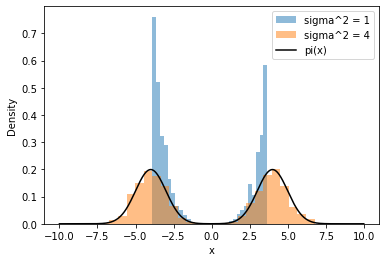

In [3]:
import matplotlib.pyplot as plt

# Define the target distribution pi(x)
def pi(x):
    return 0.5 * norm.pdf(x, loc=-4, scale=1) + 0.5 * norm.pdf(x, loc=4, scale=1)

# Plot the histogram of the samples generated using a Gaussian proposal with sigma^2 = 1
plt.hist(X1, bins=30, density=True, alpha=0.5, label='sigma^2 = 1')

# Plot the histogram of the samples generated using a Gaussian proposal with sigma^2 = 4
plt.hist(X2, bins=30, density=True, alpha=0.5, label='sigma^2 = 4')

# Overlay the true density pi(x)
x = np.linspace(-10, 10, 1000)
plt.plot(x, pi(x), 'k', label='pi(x)')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


This code uses the `matplotlib` library to plot the histograms of the samples `X1` and `X2` generated using different proposal distributions with `sigma2 = 1` and `sigma2 = 4`, respectively. It also plots the true density `pi(x)` as a black line on top of the histograms.

The choice of `sigma2` for the proposal distribution can affect the quality of the samples generated by the importance resampling algorithm. If `sigma2` is too small, then the proposal distribution might not cover the entire support of the target distribution `pi(x)`, resulting in samples that are concentrated in a small region of the space. On the other hand, if `sigma2` is too large, then the proposal distribution might generate many samples in regions where `pi(x)` is very small, resulting in a large variance for the importance weights and a high variance for the importance sampling estimator. A good choice of `sigma2` should balance these two considerations and generate samples that are representative of the target distribution `pi(x)`.

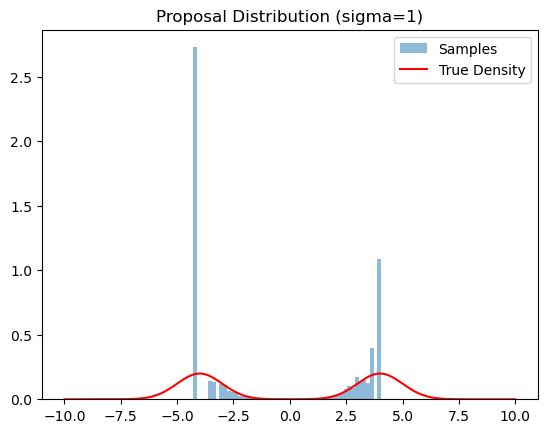

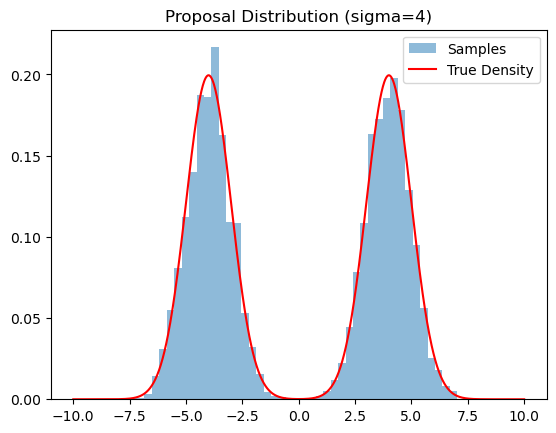

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the target distribution
def target_distribution(x):
    return 0.5 * norm.pdf(x, loc=-4, scale=1) + 0.5 * norm.pdf(x, loc=4, scale=1)

# Define the proposal distribution
def proposal_distribution(x, sigma):
    return norm.pdf(x, loc=0, scale=sigma)

# Generate samples from the proposal distribution
def generate_samples(N, sigma):
    return np.random.normal(loc=0, scale=sigma, size=N)

# Compute the importance weights
def compute_weights(samples, sigma):
    target_vals = target_distribution(samples)
    proposal_vals = proposal_distribution(samples, sigma)
    weights = target_vals / proposal_vals
    return weights / np.sum(weights)

# Resample particles based on the weights
def resample(samples, weights):
    indices = np.random.choice(len(samples), size=len(samples), replace=True, p=weights)
    return samples[indices]

# Plot histograms of samples and overlay with the true density
def plot_histograms(samples, sigma):
    plt.hist(samples, bins=50, density=True, alpha=0.5, label='Samples')
    x = np.linspace(-10, 10, 1000)
    plt.plot(x, target_distribution(x), 'r', label='True Density')
    plt.title(f'Proposal Distribution (sigma={sigma})')
    plt.legend()
    plt.show()

# Set the number of particles and time horizon
N = 10000
T = 1

# Generate samples and compute weights for different choices of sigma
sigmas = [1, 4]
for sigma in sigmas:
    samples = generate_samples(N, sigma)
    weights = compute_weights(samples, sigma)
    resampled_samples = resample(samples, weights)
    plot_histograms(resampled_samples, sigma)